**Part 1- Neural Network**

In [ ]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds
import pathlib
import matplotlib.pyplot as plt
import keras.datasets.fashion_mnist as fashion_mnist

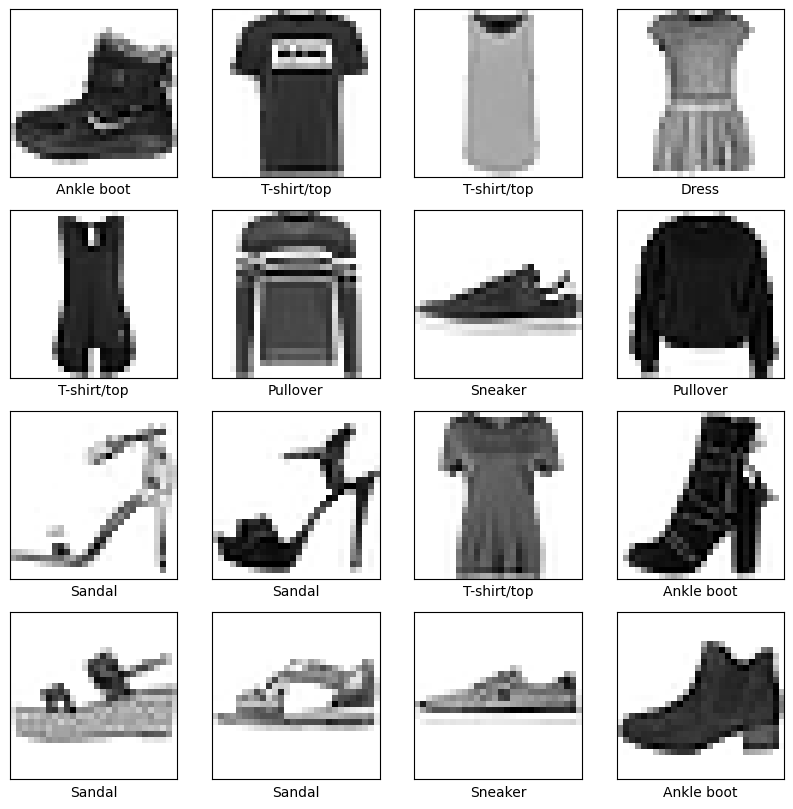

In [ ]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# plot 4 images as gray scale
plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

In [ ]:
# flatten 28*28 images to a 784 vector for each image
IMG_HEIGHT=28
IMG_WIDTH= 28
channels =1

In [ ]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [ ]:
#Create the model here
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model = tf.keras.Sequential([
                             tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
                             tf.keras.layers.Dense(128, activation= 'relu'),
                             tf.keras.layers.Dense(10, activation= 'softmax')])
model.compile(optimizer='adam', loss= loss_fn, metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Train the model here
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=20, batch_size=128)

Epoch 1/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.7279 - loss: 0.8039 - val_accuracy: 0.8446 - val_loss: 0.4510
Epoch 2/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8511 - loss: 0.4286 - val_accuracy: 0.8620 - val_loss: 0.3975
Epoch 3/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8604 - loss: 0.3911 - val_accuracy: 0.8680 - val_loss: 0.3693
Epoch 4/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8760 - loss: 0.3509 - val_accuracy: 0.8654 - val_loss: 0.3801
Epoch 5/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8812 - loss: 0.3354 - val_accuracy: 0.8749 - val_loss: 0.3493
Epoch 6/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8860 - loss: 0.3167 - val_accuracy: 0.8761 - val_loss: 0.3549
Epoch 7/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8912 - loss: 0.3032 - val_accuracy: 0.8804 - val_loss: 0.3389
Epoch 8/20
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8968 - loss: 0.2863 - val_accuracy: 0.

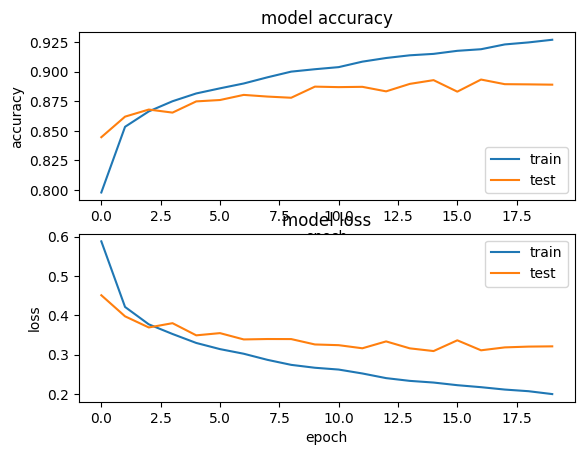

In [ ]:
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.show()

In [ ]:
# Write your understanding about this model here

The model demonstrates good learning on the training data, with training accuracy reaching around 92% and a steadily decreasing training loss over 20 epochs. The validation accuracy initially improves but stabilizes around 88%, with minor fluctuations, while the validation loss plateaus after approximately 10-15 epochs. This pattern indicates slight overfitting, as the model continues to improve on the training set without significant gains on the validation set.

To enhance generalization and mitigate overfitting, techniques like early stopping, dropout, or L2 regularization could be beneficial. Alternatively, reducing the model complexity or training for fewer epochs may also help the model generalize better to new data.

**Part 2- Image Processing**

Load the Flower photo dataset from tensorflow repository

In [ ]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(origin=dataset_url,
                                   fname='flower_photos',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

class_names = sorted([item.name for item in data_dir.glob('*') if item.is_dir()])

# Count images in each subfolder
for class_name in class_names:
    print(f"{class_name}: {len(list(data_dir.glob(class_name + '/*')))} images")

daisy: 633 images
dandelion: 898 images
roses: 641 images
sunflowers: 699 images
tulips: 799 images


*a) How many images we can find in this dataset?*




In [ ]:
image_count = len(list(data_dir.glob('*/*.jpg')))  #This will count all the file with extension of jpg
print(image_count)

3670


*b) The list of subfolders are:*
*   daisy
*   dandelion
*   roses
*   sunflowers
*   tulips

You can look into any of the subfolders to see images stored over there. You can look into the folder using: data_dir.glob('tulips/*')
For this part use Pillow (PIL) to show at least one flower from each subfolder


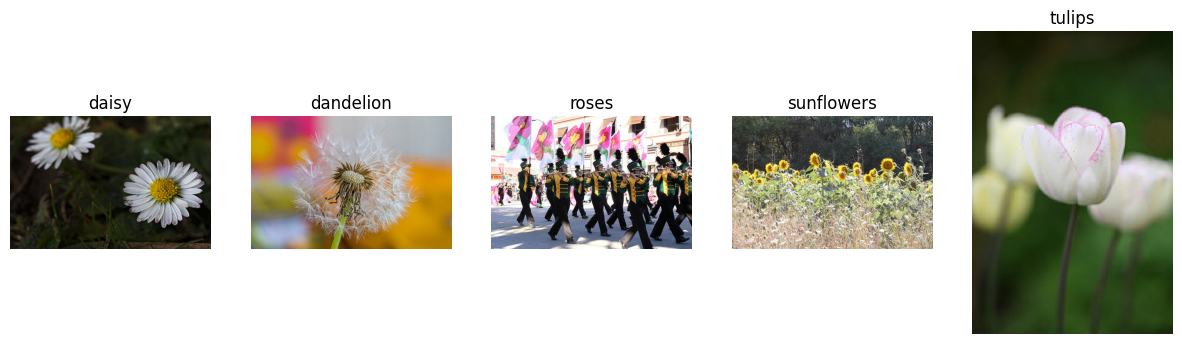

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# Display one flower image from each subfolder using Pillow (PIL)
plt.figure(figsize=(15, 10))
for i, class_name in enumerate(class_names):
    # Store the list of images in the current subfolder
    flowers = list(data_dir.glob(class_name + '/*'))

    # Open the third image in the subfolder using Pillow
    img = Image.open(str(flowers[2]))

    # Display the image inline
    plt.subplot(1, len(class_names), i + 1)
    plt.imshow(img)
    plt.title(class_name)
    plt.axis('off')

plt.show()

*c) Use Keras to resize all the images into same dimension 180x180*

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# Convert all the images in data_dir folder into 180x180 using tf.kera.utils.image_dataset_from_directory
# Modify following code
train_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,  # Use 20% of the data for validation
    subset="training",     # Indicate that this is the training subset
    seed=123,              # Seed for reproducibility
    image_size=(180, 180), # Resize images to 180x180
    batch_size=32          # Set the batch size
    )

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [ ]:
# Use the same strategy to create validation data, this time from validation subset
val_ds = tf.keras.utils.image_dataset_from_directory(data_dir,
    validation_split=0.2,  # Use 20% of the data for validation
    subset="validation",   # Indicate that this is the validation subset
    seed=123,              # Seed for reproducibility
    image_size=(180, 180), # Resize images to 180x180
    batch_size=32          # Set the batch size
)


Found 3670 files belonging to 5 classes.
Using 734 files for validation.


d) *You can use* `train_ds.class_names` *command to get the list of labels. Write a code to randomly show 9 images from training data while printing their label on top of the image.*

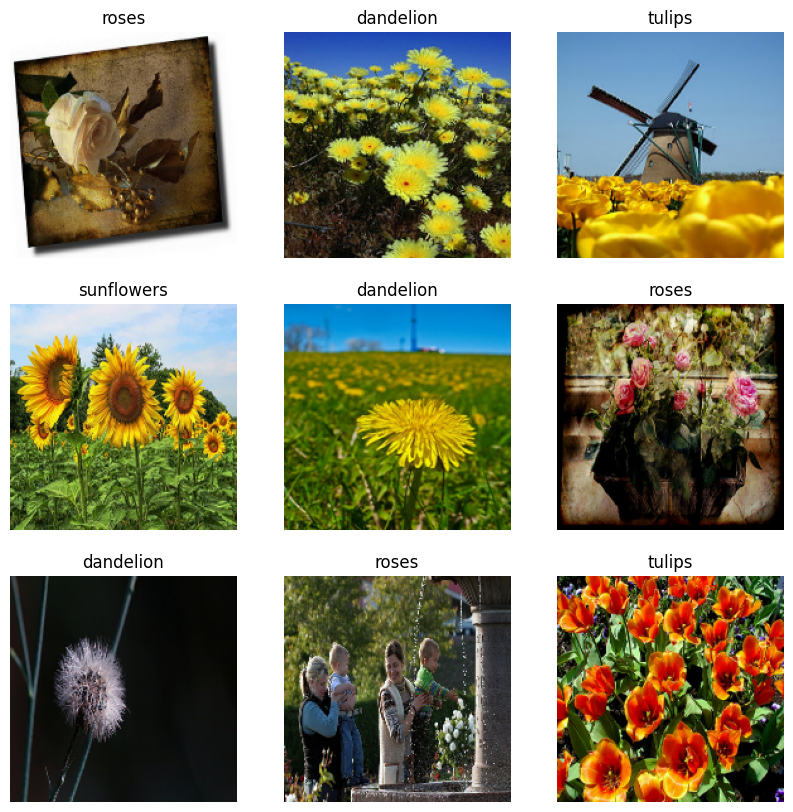

In [ ]:
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [ ]:
# Please carefully review the images. What are some barriers that you can see in images for having a proper classification?

There are other subjects in the image which can be seen as the primary subject thus creating ambiquity to the model. Also some images are not formatted properly and are not scropped and rotated in a uniform format.

*e* - *Now, we want to use preprocessing package in Keras to apply different filters to the image. Apply the following procedures to image data:*
- *Rescale the image by dividing by 255*
- *Shear the image 20%*
- *Zoom the image 20%*
- *Horizontally flip the images*

In [ ]:
from tensorflow import keras
from keras._tf_keras.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1.0/255,          # Rescale images by dividing by 255
    shear_range=0.2,          # Apply 20% shear transformation
    zoom_range=0.2,           # Apply 20% zoom transformation
    horizontal_flip=True      # Enable horizontal flipping
)

training_set = train_datagen.flow_from_directory(
    data_dir,                 # Path to the main data directory
    target_size=(180, 180),   # Resize images to 180x180
    batch_size=32,            # Set batch size
    class_mode='categorical'  # Use 'categorical' for multi-class classification
)



Found 3670 images belonging to 5 classes.


**Part 3- OPENCV**- Now use opencv for preprocessing. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.

<Figure size 1000x1000 with 0 Axes>

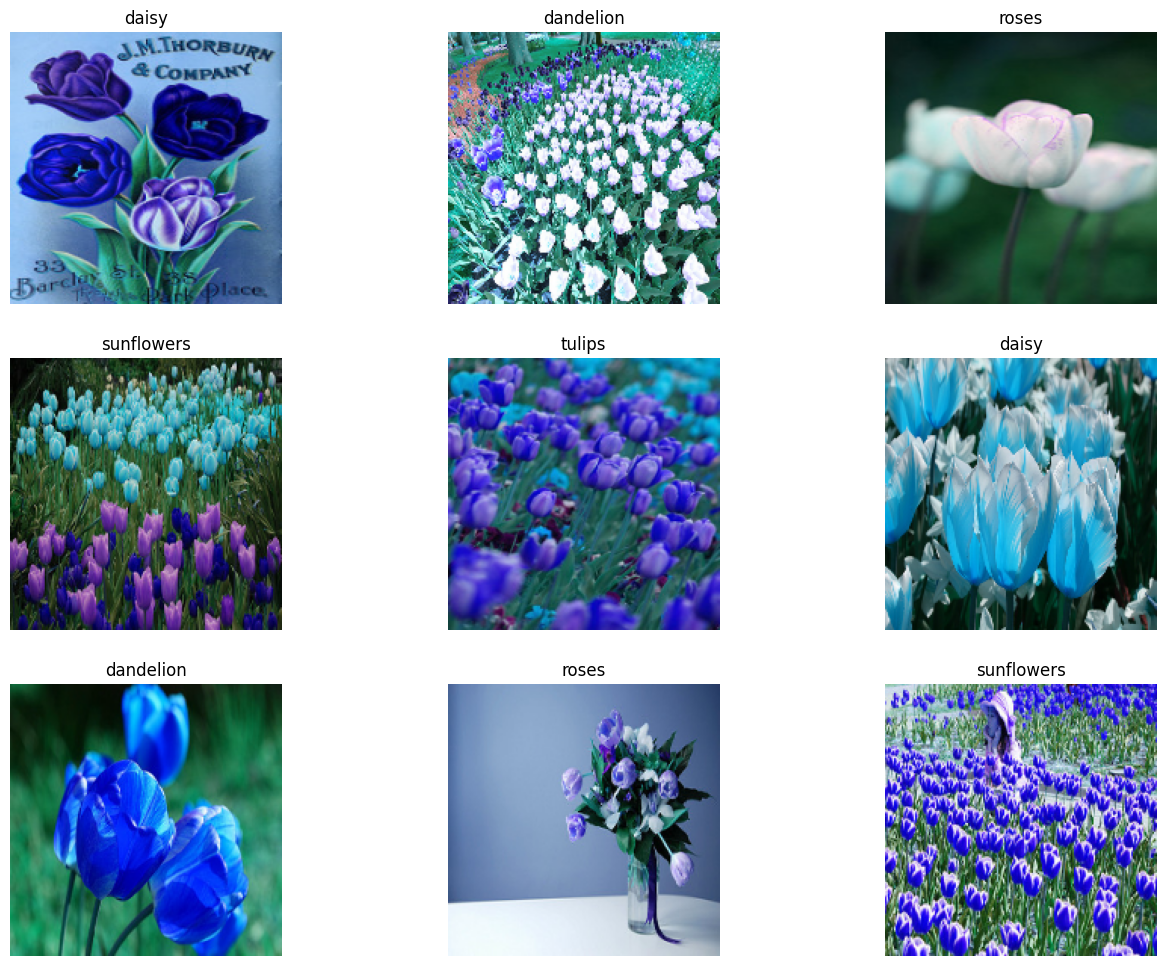

In [ ]:
# Repeat same preprocessing but this time using OpenCV. Show first 9 images in dataset using Opencv. Before showing each image, resize the images to 180x180.
import cv2
list_of_images= list(data_dir.glob('*/*.jpg'))
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
fig=plt.figure(figsize=(16, 12))

for i in range(9):
    # Load the image with OpenCV
    img_path = str(list_of_images[i])
    img = cv2.imread(img_path)

    # Resize the image to 180x180
    img_resized = cv2.resize(img, (180, 180))

    # Display the image in the subplot
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(img_resized)
    plt.title(class_names[i % len(class_names)])  # Display class name for each image
    plt.axis("off")

plt.show()




```
# This is formatted as code
```

OpenCV uses BGR as its default colour order for images, matplotlib uses RGB. When you display an image loaded with OpenCv in matplotlib the channels will be back to front.
The easiest way of fixing this is to use OpenCV to explicitly convert it back to RGB, much like you do when creating the greyscale image.
`RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)`

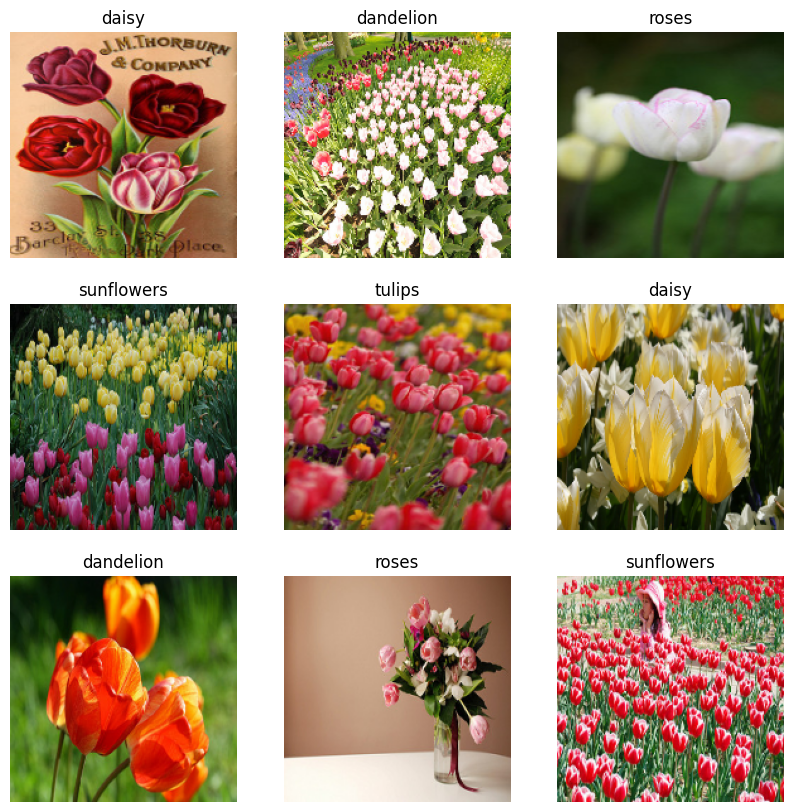

In [ ]:
import cv2
import matplotlib.pyplot as plt

# Get a list of image paths and class names
list_of_images = list(data_dir.glob('*/*.jpg'))
class_names = train_ds.class_names

# Set up the plot for displaying images
plt.figure(figsize=(10, 10))

# Loop to process and display the first 9 images
for i in range(9):
    # Load the image with OpenCV
    img_path = str(list_of_images[i])
    img = cv2.imread(img_path)

    # Resize the image to 180x180
    img_resized = cv2.resize(img, (180, 180))

    # Convert the image from BGR to RGB
    RGB_img = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

    # Display the image in the subplot
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(RGB_img)
    plt.title(class_names[i % len(class_names)])  # Display class name for each image
    plt.axis("off")

plt.show()